# Covid-19 - Report

## Giới thiệu

Xây dựng các biểu đồ trực quan nhằm đánh giá tình hình dịch bệnh.
-ThanhCj-

#### "Xem xét đánh giá các thay đổi tình hình dịch covid-19"

## Dữ liệu sử dụng

https://github.com/CSSEGISandData/COVID-19

### Import Libraries

In [10]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Done!')



Done!


### Đọc dữ liệu từ nguồn

#### Các bảng dữ liệu gồm có
- Số ca đã xác nhận
- Số ca tử vong
- Số ca hồi phục
##### Các bảng được cập nhật theo thời gian mỗi ngày.

In [5]:
#Để đọc từ github, xem file ở chế độ raw, lấy url
confirmed_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df_confirmed = pd.read_csv(confirmed_data_url, error_bad_lines=False)
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


In [7]:
#Để đọc từ github, xem file ở chế độ raw, lấy url
death_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
df_death = pd.read_csv(death_data_url, error_bad_lines=False)
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,16,19,22,22,27,29,29,29,33,35
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,3,4


In [9]:
#Để đọc từ github, xem file ở chế độ raw, lấy url
recovered_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
df_recovered = pd.read_csv(recovered_data_url, error_bad_lines=False)
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,34,35,35,35,35,41,42,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,118,118,144,144,144,150,191,232
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,96,97,105,105,109,114,114,114,124,140
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,26,26,35,42,42,49,60,75,87,114


## Mức tăng ở các quốc gia

Biểu đồ so sánh giữa các quốc gia top 15

In [119]:
df_cs = df_confirmed.drop(columns=['Province/State','Lat', 'Long'])
df_cs.columns = df_cs.columns.str.strip()
cl=df_cs.columns[1:].str.strip()
df_cs = df_cs.groupby('Country/Region', as_index = False)[cl].sum()
df_cs.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7,7,11,16,21,22,22,22,24,24
1,Albania,0,0,0,0,0,0,0,0,0,...,23,33,38,42,51,55,59,64,70,76
2,Algeria,0,0,0,0,0,0,0,0,0,...,24,26,37,48,54,60,74,87,90,139
3,Andorra,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,39,39,53,75,88
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [134]:
df_cs.sort_values(by=cl[len(cl)-1], ascending=False, inplace=True)
df_cs.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
33,China,548,643,920,1406,2075,2877,5509,6087,8141,...,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305
79,Italy,0,0,0,0,0,0,0,0,0,...,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578
155,US,1,1,2,2,5,5,5,5,5,...,1663,2179,2727,3499,4632,6421,7783,13677,19100,25489
142,Spain,0,0,0,0,0,0,0,0,0,...,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374
62,Germany,0,0,0,0,0,1,4,4,4,...,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213


Loại trừ China và Italia, lấy top 10

In [149]:
df_cf = df_cs.iloc[2:10]
df_cf.set_index('Country/Region', inplace=True)
df_cf = df_cf.transpose()
df_cf.head()

Country/Region,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,United Kingdom
1/22/20,1,0,0,0,0,1,0,0
1/23/20,1,0,0,0,0,1,0,0
1/24/20,2,0,0,0,2,2,0,0
1/25/20,2,0,0,0,3,2,0,0
1/26/20,5,0,0,0,3,3,0,0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

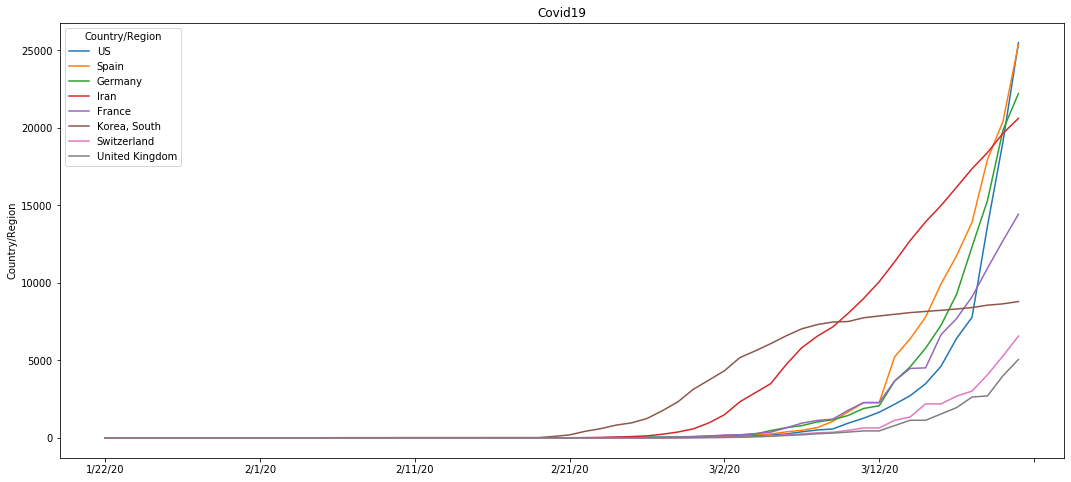

In [150]:
df_cf.plot(kind='line')

plt.title('Covid19')
plt.ylabel('Country/Region')
plt.xlabel(cl)

plt.rcParams['figure.figsize'] = [18, 8]
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, 'zz') # see note below

plt.show() 